**Importing Required libraries**

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive #connnecting to google drive
drive.mount('/content/drive/')
#importing the essential libraraies for perfroming NLP on 'Restauarants_reviews.tsv' dataset
import nltk   #natural languagae toolkit,is a apackage that you can use for NLP
import re     #re, can be used to work with regular expressions
nltk.download('stopwords')  #the nlkt corpus is  a massive dump of all kinds of NL datasets that are definitely worth taking a look at.
from nltk.corpus import stopwords   #stopword is commonly used word(such as "the","a","an","in") that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer

import sklearn
from sklearn.feature_extraction.text import CountVectorizer #countervectorizer is a method text to numnerical data
from sklearn.model_selection import train_test_split   #usr to split the original data into training data and test data
from sklearn.naive_bayes import MultinomialNB  #the multinomialnaivebayes classifier is suitable for classification wit discrete features(eg: word counts for text classifcation)

from sklearn.metrics import accuracy_score

Mounted at /content/drive/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Exploratory Data Analysis**

**Get the  Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [ ]:
#shape=tuple of array dimension(row,column)

df.shape

(1000, 2)

In [ ]:
#returns the label og=f te each column in the DataFrame

df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
#view the data

df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
#information about the dataFrame

df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(996, 2)

In [ ]:
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

**Data Preprocessing**

**Cleaning the messages**

In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.Review[i]) #Cleaning special character from the message
      #the re.sub() method performs global search and globalreplace on the given string.
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

In [ ]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

**Creating the Bag of Words model**

In [ ]:
cv = CountVectorizer(max_features=1500)  #max_features=1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

**train_test_split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**Predicting the Test set results**

In [ ]:
#fitting Naive Bayes to the training set

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)  #fitting training data

MultinomialNB(alpha=0.1)

In [ ]:
#predicting the test set rules

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1])

**Accuracy Score**

In [ ]:

from sklearn.metrics import accuracy_score
#in python., the accuracy_score function of the sklearn.metrics pacakge cslculates the accuarcy scor for a set of predicted labels against the true labels.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("------Scores-----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

------Scores-----
Accuracy score is: 76.5%
Precision score is: 78.3%
Recall score is: 77.57%


In [ ]:
#Making the confusion matrix
#A confusion matrix is a table that is used to define the performance of a classifiction algorithm.
#A confusion matrix visualises and summarizes the performance of a classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[70, 23],
       [24, 83]])

Text(95.72222222222221, 0.5, 'Actual values')

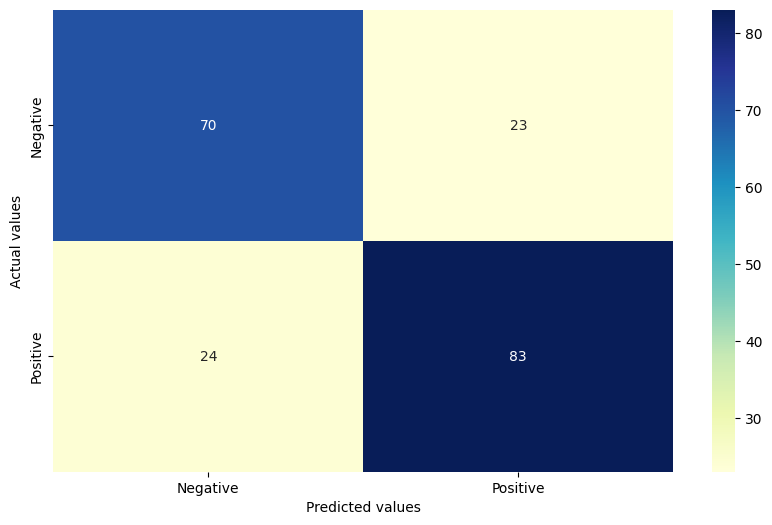

In [ ]:
#plotting the confusion matrix

import matplotlib.pyplot as plt  #matplot is a loe level graph plotiing library
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**Cheking alpha Naive Bayes Classifier**

In [ ]:
#Hyperparameter tuning the Naive Byes Classifier

best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.0 is: 77.5%
Accuracy score for alpha=0.1 is: 76.5%
Accuracy score for alpha=0.2 is: 76.0%
Accuracy score for alpha=0.3 is: 76.5%
Accuracy score for alpha=0.4 is: 77.0%
Accuracy score for alpha=0.5 is: 75.0%
Accuracy score for alpha=0.6 is: 75.0%
Accuracy score for alpha=0.7 is: 75.5%
Accuracy score for alpha=0.8 is: 76.0%
Accuracy score for alpha=0.9 is: 75.5%
Accuracy score for alpha=1.0 is: 75.5%
--------------------------------------------
The best accuracy is 77.5% with alpha value as 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


**Prediction**

In [ ]:
def predict_review(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [ ]:
result = ['Negetive Review','Positive Review']

In [ ]:
msg = 'The food is really good here.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Positive Review


In [ ]:
msg = 'Food was pretty bad and the service was very slow.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Negetive Review


In [ ]:
msg = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Positive Review
